# Logistic Regression with Python

In [132]:
# will work on titanic dataset from kaggle.
# wil prdict whether the person will survie or not.
# the is already semi cleaned.

In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [134]:
train = pd.read_csv("titanic_train.csv")

In [135]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# EDA

### Handling missing values

In [136]:
# we can use seaborn to create a simple heatrmap to see where we are missing the values.

In [137]:
train.isnull() 
# returns True for the position where there is no data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

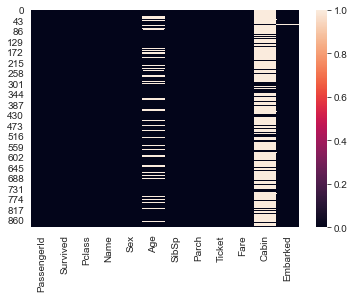

In [138]:
sns.heatmap(train.isnull())
# here you can see yaxis having some labels, to remove those from y axis swe use yticklabels argument

<AxesSubplot:>

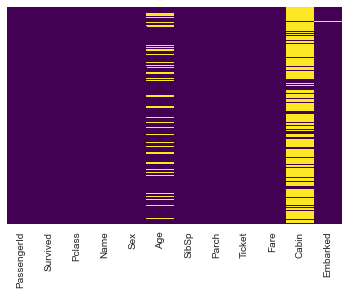

In [139]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap="viridis")
# cbar False make the color bar vanish and cmap is the color combination.


We can see rought 20-25% of age data and 85% of the cabin data is missing.The age data is quite small and can be replaced by
some form of imputation.Looking at the cabin data, the missing data is too much and probably we will drop it,we cannot make use of cabin feature when so much data is missing.

<AxesSubplot:xlabel='Survived', ylabel='count'>

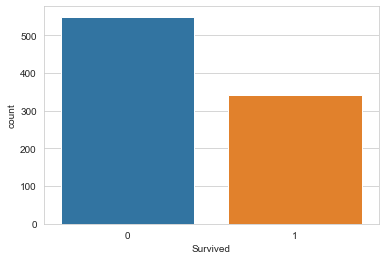

In [140]:
# exploring the data 
sns.set_style("whitegrid")
sns.countplot("Survived",data=train)

0 means the people didnt survuved and 1 means survived.We can see majority of the people didnt make it.

<AxesSubplot:xlabel='Survived', ylabel='count'>

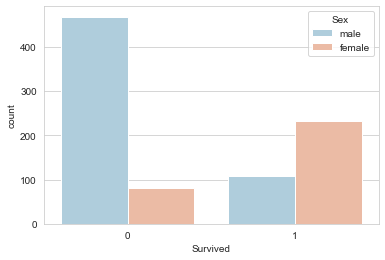

In [141]:
sns.set_style("whitegrid")
sns.countplot(x="Survived",hue="Sex",data=train,palette="RdBu_r")

Here we can see that very few females lost their life with respect to the male gender.

<AxesSubplot:xlabel='Survived', ylabel='count'>

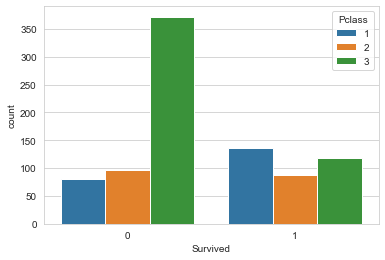

In [142]:
sns.set_style("whitegrid")
sns.countplot(x="Survived",hue="Pclass",data=train)

Pclass is the passenger class and we can see,passengers from the 3rd class were the most affected people, as we know from the movie jack was a 3rd class passenger and how people were treated from those class.

<AxesSubplot:xlabel='Age'>

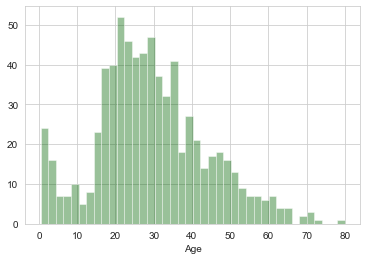

In [143]:
# now we will be trying to find the distribution of age of people on the titanic ship from our data.
sns.distplot(train["Age"].dropna(),kde=False,bins=40,color="darkgreen")

From the graph we are able to see the graph gives kind of a bell shape curve.

<AxesSubplot:>

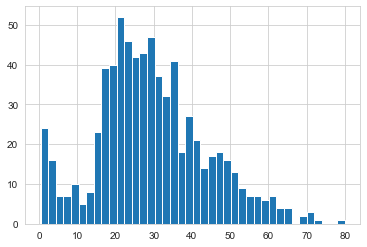

In [144]:
# if we want to use the dataframe directly we can do that too for visualisation.
train["Age"].dropna().hist(bins=40)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

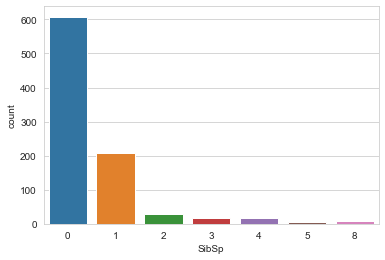

In [145]:
sns.countplot(x="SibSp",data=train)

SibSp stands for spouse and siblings. so we can see from the graph majority of people were bachelors.

<AxesSubplot:xlabel='SibSp', ylabel='count'>

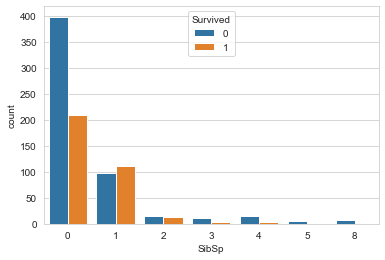

In [146]:
sns.countplot(x="SibSp",hue="Survived",data=train)

From the above graph we can see that majority of people who didnt survived were bachelors.

So from the data analysis that we have done till now, we have an idea that majority of people who dies were male,from the third class and were bachelors.So a there is ahigh chance of a person not survivng if the person is male,was in 3rd class and was a bachelor.(We cannot be sure we are still analysing but we got an intuition). 

<AxesSubplot:xlabel='Fare'>

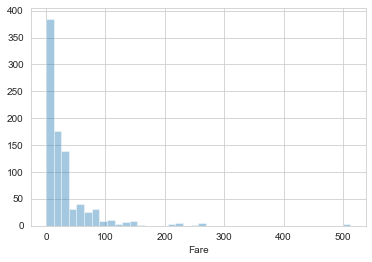

In [147]:
sns.distplot(train["Fare"],kde=False,bins=40)

# Data Cleaning

We want to fill the missing age value instead of just dropping it.One way could be we can fill it with mean,median or mode of the age.But a more smarter and interesting way would be to check the mean age according to the passenger class and then fill NaN positions accordingly.

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

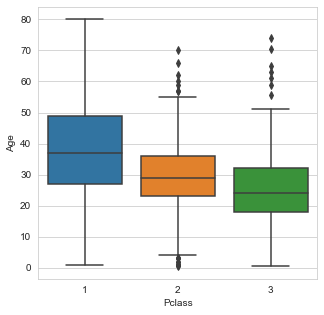

In [148]:
plt.figure(figsize=(5,5))
sns.boxplot(x="Pclass",y="Age",data=train)

We see that passenger of higher class(wealthier people) tend to be older than the other class.
Average age of people in 1st class is around 37-38.
Average age of people in 2nd class is around 29-30.
Average age of people in 3rd class is around 23-24.

In [149]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        
        elif Pclass == 2:
            return 29
        
        else:
            return 24
    else:
        return Age

The above fucntion will take the pclass and age and check if age is null or not.If age is null then it will assign the age according to the Pclass or else will simply return the age.

<AxesSubplot:>

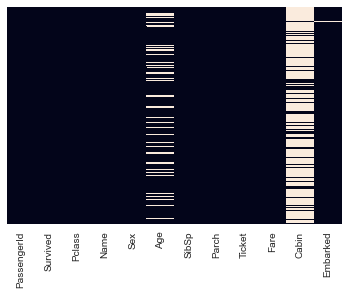

In [150]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)

In [151]:
train["Age"]=train[["Age","Pclass"]].apply(impute_age,axis=1)
# applied the impute_age function on our age column

<AxesSubplot:>

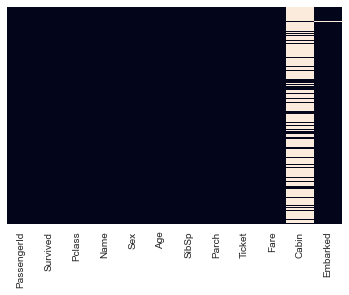

In [152]:
# now lets check the heatmap again

sns.heatmap(train.isnull(),yticklabels=False,cbar=False)

# we now have to work with cabin

Now lerts drop the cabin feature and the row in Embarked feature 

In [154]:
train.drop("Cabin",axis=1,inplace=True)

<AxesSubplot:>

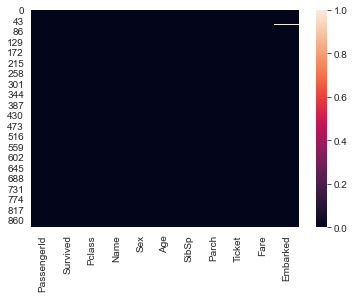

In [155]:
sns.heatmap(train.isnull())

In [156]:
train.dropna(inplace=True)

<AxesSubplot:>

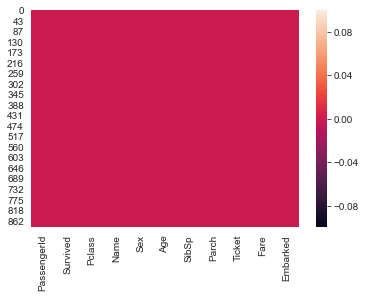

In [157]:
sns.heatmap(train.isnull())
#removed all the missing values from the dataframe.

In [158]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


# Converting Categorical Feature

We use something called as dummy variables to convert categorical feature to numerical values so that the algortihm can take them as inputs and work on them.

In [159]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [160]:
# embarked is categorical feature we will use dummy on it.

pd.get_dummies(train["Embarked"],drop_first=True)

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [161]:
sex=pd.get_dummies(train["Sex"],drop_first=True)
embarked = pd.get_dummies(train["Embarked"],drop_first=True)

In [162]:
# dropping all the features that we wont be using
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [172]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [173]:
train = pd.concat([train,sex,embarked],axis=1)

In [175]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


# Building a Logistic Regression Model

Survived is our dependent feature or like we have to find whether the person survived or not.So we will remove it from our train dataframe and also split pour train dataset in trainset and testset.

In [177]:
train.drop("Survived",axis=1).head()
# we can drp the passenger id column also

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1


In [178]:
train["Survived"].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [179]:
from sklearn.model_selection import train_test_split

In [180]:
X_train,X_test,y_train,y_test = train_test_split(train.drop("Survived",axis=1),train["Survived"],test_size=0.30,
                                                random_state=101)

### Train and predict

In [181]:
from sklearn.linear_model import LogisticRegression

In [182]:
lrmodel = LogisticRegression()
lrmodel.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [183]:
predictions = lrmodel.predict(X_test)

In [184]:
from sklearn.metrics import confusion_matrix


In [185]:
accuracy = confusion_matrix(y_test,predictions)

In [186]:
accuracy

array([[151,  12],
       [ 36,  68]], dtype=int64)

In [187]:
from sklearn.metrics import accuracy_score

In [188]:
accuracy= accuracy_score(y_test,predictions)

In [190]:
accuracy

0.8202247191011236

In [191]:
predictions

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1], dtype=int64)

In [192]:
# perform Evaluation of the model

In [193]:
from sklearn.metrics import classification_report

In [195]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.93      0.86       163
           1       0.85      0.65      0.74       104

    accuracy                           0.82       267
   macro avg       0.83      0.79      0.80       267
weighted avg       0.82      0.82      0.81       267



In [ ]:
# here we are removing the Survived and the passengerid feature instead of just removing the survived feature.

In [196]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(train.drop(['Survived','PassengerId'],axis=1), 
                                                    train['Survived'], test_size=0.30, 
                                                    random_state=101)

In [197]:
lrmodel1=LogisticRegression()
lrmodel1.fit(X_train1,y_train1)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [199]:
pred1 = lrmodel1.predict(X_test1)

In [200]:
acc1=accuracy_score(y_test1,pred1)

In [201]:
acc1

0.8089887640449438

In [202]:
print(classification_report(y_test1,pred1))
# not having passengerid.

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       163
           1       0.82      0.65      0.73       104

    accuracy                           0.81       267
   macro avg       0.81      0.78      0.79       267
weighted avg       0.81      0.81      0.80       267



In [203]:
print(classification_report(y_test,predictions))
# having passengerid

              precision    recall  f1-score   support

           0       0.81      0.93      0.86       163
           1       0.85      0.65      0.74       104

    accuracy                           0.82       267
   macro avg       0.83      0.79      0.80       267
weighted avg       0.82      0.82      0.81       267

